# Vector Calculus

Many algorithms in machine learning optimize an objective function with
respect to a set of desired model parameters that control how well a model
explains the data: Finding good parameters can be phrased as an optimization
problem. Examples include:
- Linear regression
- Neural-networks
- Gaussian mixture models

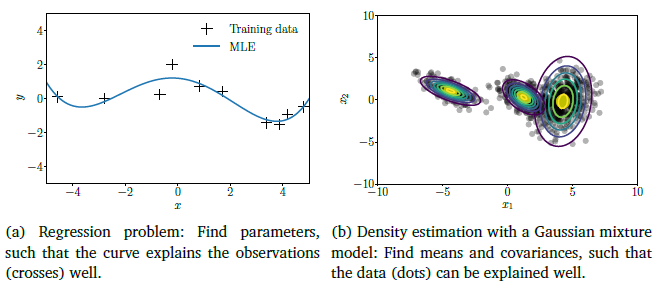

Above, we typically
solve by using optimization algorithms that exploit gradient information.

Central to this chapter is the concept of a function. A function $f$ is
a quantity that relates two quantities to each other. these
quantities are typically inputs $x \in \mathbb{R}^D$ and targets (function values) $f(x)$,
which we assume are real-valued if not stated otherwise.

Computing gradients of functions is often essential to facilitate learning in machine learning models
since the gradient points in the direction of steepest ascent. Therefore, vector calculus is one of the fundamental mathematical tools we need in
machine learning.

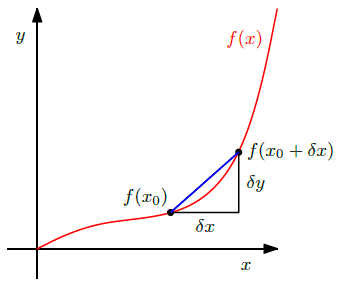

Above, the average incline of a function $f$ between $x_0$ and $x_0 + \delta x$ is the incline of a secant (blue) through $f(x_0)$ and $f(x_0 + \delta x)$ and given by $\delta y / \delta x$

## Differentiation of Univariate Functions

The difference quotient:

\begin{equation}
\frac{\delta y}{\delta x} := \frac{f(x + \delta x) - f(x)}{\delta x}
\end{equation}

computes the slope of the secant line through two points on the graph of $f$.

The difference quotient can also be considered the average slope of $f$ between $x$ and $x + \delta x$ if we assume $f$ to be a linear function. In the limit for $\delta x \rightarrow 0$, we obtain the tangent of $f$ at $x$, if $f$ is differentiable (derivative exists). The tangent is then the derivative of $f$ at $x$.

Derivative: More formally, for $h > 0$ the derivative of $f$ at $x$ is defined as the limit:

\begin{equation}
\frac{d f}{d x} := \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
\end{equation}

The derivative of $f$ points in the direction of steepest ascent of $f$


### Partial Differentiation and Gradients

Differentiation as discussed in above applies to functions $f$ of a
scalar variable $x \in \mathbb{R}$. In the following, we consider the general case
where the function $f$ depends on one or more variables $x \in \mathbb{R}$, e.g.,
$f(x) = f(x_1, x_2)$. The generalization of the derivative to functions of several
variables is the gradient.

We find the gradient of the function $f$ with respect to $x$ by varying one
variable at a time and keeping the others constant. The gradient is then
the collection of these partial derivatives.

Partial Derivative:
\begin{equation}
\frac{\delta f}{\delta x_1} = \lim_{h \rightarrow 0} \frac{f(x_1 + h, x_2, \cdots, x_n) - f(x)}{h}\\
\vdots\\
\frac{\delta f}{\delta x_1} = \lim_{h \rightarrow 0} \frac{f(x_1, x_2, \cdots, x_n + h) - f(x)}{h}
\end{equation}

and collect them in the row vector

\begin{equation}
\bigtriangledown_x f = grad f = \frac{df}{dx} = \left[ \frac{\delta f(x)}{\delta x_1} \frac{\delta f(x)}{\delta x_2} \cdots \frac{\delta f(x)}{\delta x_n} \right] \in \mathbb{R}^{1 x n}
\end{equation}

where n is the number of variables and 1 is the dimension of the image/
range/codomain of $f$. Here, we defined the column vector $x = [x_1, \cdots, x_n]^\intercal \in \mathbb{R}^n$. The row vector in is called the gradient of f or the Jacobian.

### Basic Rules of Partial Differentiation

Our gradients now involve vectors and matrices, and matrix multiplication is not commutative (the order matters).
Here are the general product rule, sum rule, and chain rule:

\begin{equation}
\text{Product Rule: } \frac{\delta}{\delta x}(f(x)g(x)) = \frac{\delta f}{\delta x}g(x) + f(x)  \frac{\delta g}{\delta x}
\end{equation}
\
\begin{equation}
\text{Sum Rule: } \frac{\delta}{\delta x}(f(x)g(x)) = \frac{\delta f}{\delta x}g(x) + \frac{\delta g}{\delta x}
\end{equation}
\
\begin{equation}
\text{Chain rule: } \frac{\delta}{\delta x}(g \circ f) = \frac{\delta}{\delta x}(g(f(x))) = \frac{\delta g}{\delta f} \frac{\delta f}{\delta x}
\end{equation}

### Chain Rule

Consider a function $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ of two variables $x_1, x_2$. Furthermore, $x_1(t)$ and $x_2(t)$ are themselves functions of $t$. To compute the gradient of
$f$ with respect to $t$, we need to apply the chain rule for multivariate
functions as

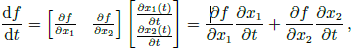

where $d$ denotes the gradient of the $\delta$ partial derivatives.

If $f(x_1, x_2)$ is a function of $x1$ and $x2$, where $x_1(s, t)$ and $x_2(s, t)$ are
themselves functions of two variables $s$ and $t$, the chain rule yields the
partial derivatives

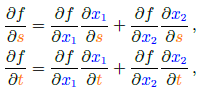

and the gradient is obtained by the matrix multiplication

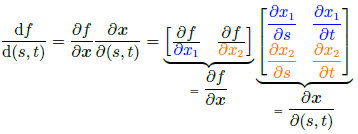

## Gradients of Matrices

We will encounter situations where we need to take gradients of matrices
with respect to vectors (or other matrices), which results in a multidimensional
tensor. We can think of this tensor as a multidimensional array that collects partial derivatives. For example, if we compute the gradient of an
$m \times n$ matrix $A$ with respect to a $p \times q$ matrix $B$, the resulting Jacobian
would be $(m \times n)\times(p \times q)$, i.e., a four-dimensional tensor $J$, whose entries
are given as $J_{ijkl} = \delta A_{ij} = \delta B_{kl}$